# We mainly do logistic regression in this notebook

In [1]:
from pre import complete_data,plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import itertools
import numpy as np
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty="l1")
scaler = StandardScaler()
classifier.fit( scaler.fit_transform(complete_data.loc["train"].drop(complete_data.loc["train"].select_dtypes(include="object").dtypes.index, axis=1)), complete_data.loc["train"]["class"] )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3]:
p = classifier.predict(scaler.transform(complete_data.loc["test"].drop(complete_data.loc["test"].select_dtypes(include="object").dtypes.index, axis=1)))

In [4]:
p_proba = classifier.predict_proba(scaler.transform(complete_data.loc["test"].drop(complete_data.loc["test"].select_dtypes(include="object").dtypes.index, axis=1)))

# The accuracy is: 

In [5]:
# The accuracy of logistic regression model
# The "class" in train and test is a little bit different. "train":"<=50K" while "test":"<=50K."
from sklearn.metrics import accuracy_score
print(accuracy_score(p+".",complete_data.loc["test"]["class"]))

0.8525889073152755


# Confusion matrix:

In [6]:
# Count the freq of each class in test dataset
from collections import Counter
cnt = Counter(complete_data.loc["test"]["class"])
print(cnt)

# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(complete_data.loc["test"]["class"],p+"."))

Counter({' <=50K.': 12435, ' >50K.': 3846})
[[11580   855]
 [ 1545  2301]]


|Confusion matrix| Predicted True| Predicted False|
|---------|-------|------|
|Condition True|11580 |855|
|Condition False|1545 | 2301|

(True:<=50K,False:>50K)

Normalized confusion matrix
[[0.93124246 0.06875754]
 [0.40171607 0.59828393]]


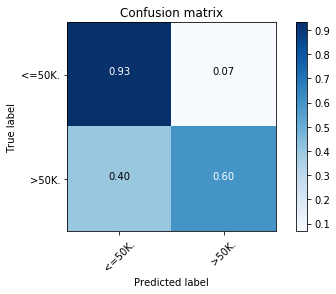

In [7]:
plot_confusion_matrix(confusion_matrix(complete_data.loc["test"]["class"],p+"."),
                     classes = np.array(["<=50K.",">50K."]),normalize=True)

# AUC ROC

In [8]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(complete_data.loc["test"]["class"]==" <=50K.",p_proba[:,0],average="weighted")) # "weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.

0.9044666692176333


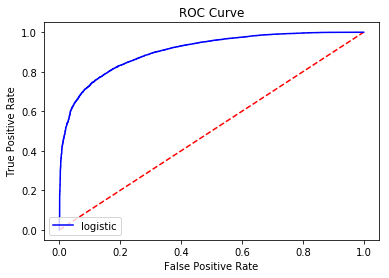

In [9]:
f,ax = plt.subplots()
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.plot([0,1],[0,1],'r--')

from sklearn.metrics import roc_curve
tpr,fpr,_ = roc_curve(complete_data.loc["test"]["class"],p_proba[:,0],pos_label = " <=50K.")
ax.plot(tpr,fpr,c='b',label="logistic")
ax.legend(loc="lower left")
plt.show()

# PR curve

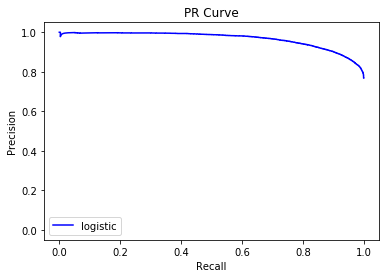

In [10]:
f,ax = plt.subplots()
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('PR Curve')

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
p,r,_ = precision_recall_curve(complete_data.loc["test"]["class"],p_proba[:,0],pos_label = " <=50K.")
ax.plot(r,p,c='b',label="logistic")
ax.legend(loc="lower left")
plt.show()